<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1> Geometric Operations and Other Mathematical Tools with OpenCV</h1>


Estimated time needed: **40** minutes


<h2> Spatial Operations in Image Processing</h2>


Spatial operations use  pixels in a neighborhood to determine the present pixel value. Applications include filtering and sharpening. They are used in many steps in computer vision like segmentation and are a key building block in Artificial Intelligence algorithms.


- Linear Filtering
    - Filtering Noise
    - Gaussian Blur
    - Image Sharpening
- Edges
- Median
- Threshold


* * *


Download the images for the lab


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png   

--2023-12-13 22:30:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7243 (7.1K) [image/jpeg]
Saving to: ‘cameraman.jpeg.2’

cameraman.jpeg.2    100%[===================>]   7.07K  --.-KB/s    in 0s      

2023-12-13 22:30:30 (51.4 MB/s) - ‘cameraman.jpeg.2’ saved [7243/7243]

--2023-12-13 22:30:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-stor

We will import the following libraries


In [2]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to perform filtering on an image
import cv2
# Used to create kernels for filtering
import numpy as np

This function will plot two images side by side 


In [3]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

Spatial operations use the nanoring pixels to determine the present pixel value 


## Linear  Filtering


Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.


Consider the following image:


[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


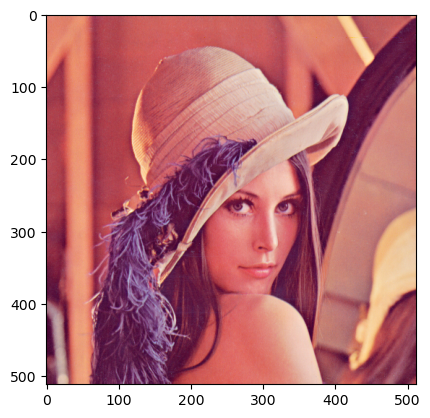

In [4]:
# Loads the image from the specified file
image = cv2.imread("lenna.png")
print(image)
# Converts the order of the color from BGR (Blue Green Red) to RGB (Red Green Blue) then renders the image from the array of data
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

The images we are working with are comprised of RGB values which are values from 0 to 255. Zero means white noise, this makes the image look grainy:


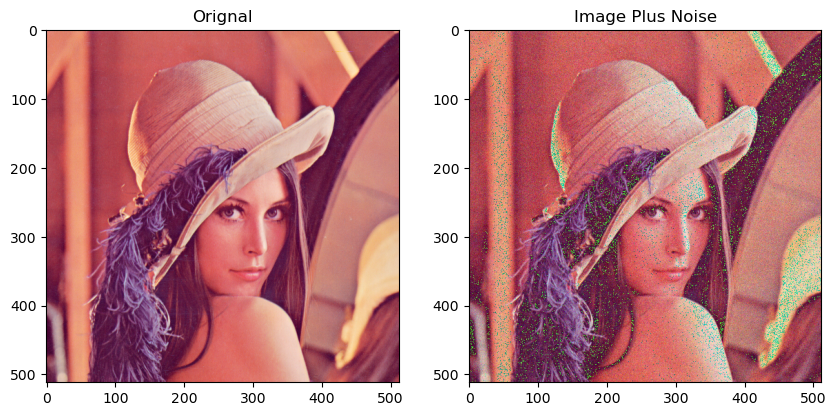

In [5]:
# Get the number of rows and columns in the image
rows, cols,_= image.shape
# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
# Add the noise to the image
noisy_image = image + noise
# Plots the original image and the image with noise using the function defined at the top
plot_image(image, noisy_image, title_1="Orignal",title_2="Image Plus Noise")

When adding noise to an image sometimes the value might be greater than 255, in this case, 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 we get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.


### Filtering Noise


Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the  kernel simply averages out the kernels in a neighborhood.


In [6]:
# Create a kernel which is a 6 by 6 array where each value is 1/36
kernel = np.ones((6,6))/36

The function <code>filter2D</code> performs 2D convolution between the image <code>src</code> and the  <code>kernel</code> on each color channel independently. The parameter <a href="https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01#filter_depths">ddepth</a> has to do with the size of the output image, we will set it to -1 so the input and output are the same size.


In [7]:
# Filters the images using the kernel
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)

We can plot the image before and after the filtering; we see the noise is reduced, but the image is blurry:


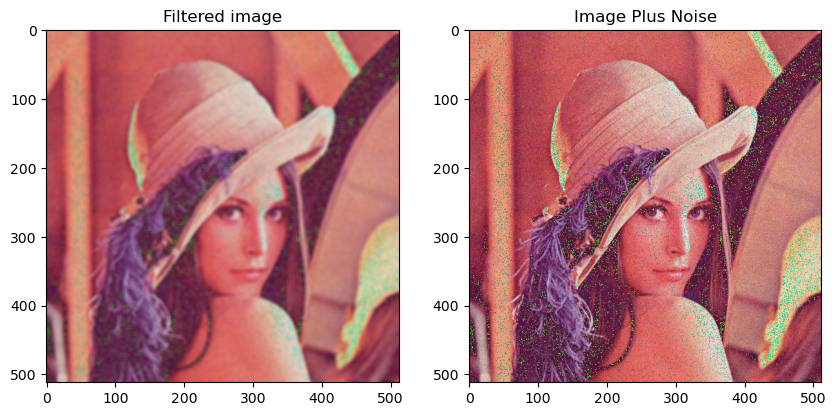

In [8]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 4x4 kernel


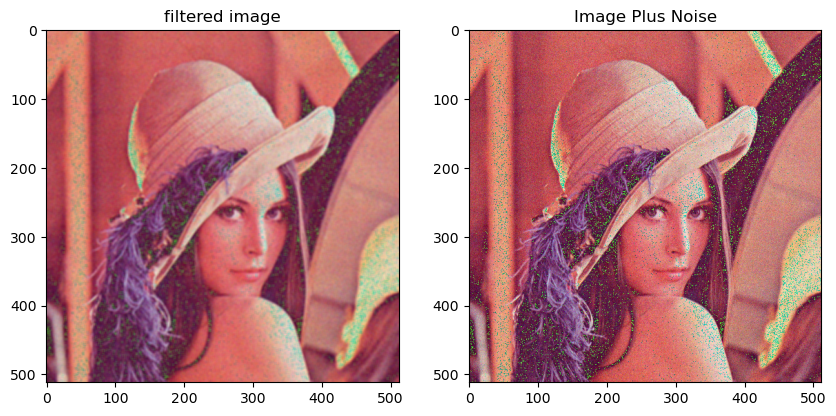

In [9]:
# Creates a kernel which is a 4 by 4 array where each value is 1/16
kernel = np.ones((4,4))/16
# Filters the images using the kernel
image_filtered=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

### Gaussian Blur


The function  <code>GaussianBlur</code> convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:


Parameters

<p><code>src</code> input image; the image can have any number of channels, which are processed independently</p>
<p><code>ksize:</code> Gaussian kernel size</p>
<p><code>sigmaX</code> Gaussian kernel standard deviation in the X direction</p>
<p><code>sigmaY</code> Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX </p>


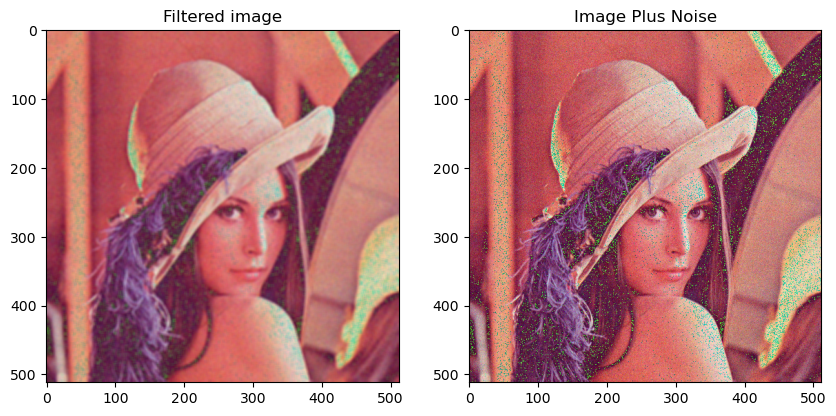

In [10]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Sigma behaves like the size of the mean filter, a larger value of sigma will make the image blurry, but you are still constrained by the size of the filter, there we set sigma to 10


In [ ]:
# Filters the images using GaussianBlur on the image with noise using a 11 by 11 kernel 
image_filtered = cv2.GaussianBlur(noisy_image,(11,11),sigmaX=10,sigmaY=10)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

See what happens when you set different values of sigmaX, sigmaY, and or use  non-square kernels.


### Image Sharpening


Image Sharpening  involves smoothing the image and calculating the derivatives.  We can accomplish image sharpening by applying the following Kernel.


In [ ]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges


Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let’s use the Sobel edge detector. This combines several convolutions and finding the magnitude of the result. Consider the following image:


In [ ]:
# Loads the image from the specified file
img_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
print(img_gray)
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray ,cmap='gray')

We smooth the image, this decreases changes that may be caused by noise that would  affect the gradient.


In [ ]:
# Filters the images using GaussianBlur on the image with noise using a 3 by 3 kernel 
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
# Renders the filtered image
plt.imshow(img_gray ,cmap='gray')

We can approximate the derivative in the X or Y direction  using the <code>Sobel</code> function, here are the parameters:


<p><code>src</code>: input image</p>
<p><code>ddepth</code>: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: order of the derivative x</p>
<p><code>dx</code>: order of the derivative y</p>
<p><code>ksize</code> size of the extended Sobel kernel; it must be 1, 3, 5, or 7</p>


dx = 1 represents the derivative in the x-direction.  The function approximates  the derivative by  convolving   the image with the following kernel  


\begin{bmatrix} 
1 & 0 & -1 \\\\
2 & 0 & -2 \\\\
1 & 0 & -1 
\end{bmatrix}


We can apply the function:


In [ ]:
ddepth = cv2.CV_16S
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)

We can plot the result 


In [ ]:
plt.imshow(grad_x,cmap='gray')

dy=1 represents the derivative in the y-direction.  The function approximates  the derivative by  convolving   the image with the following kernel 


\begin{bmatrix} 
\ \ 1 & \ \ 2 & \ \ 1 \\\\
\ \ 0 & \ \ 0 & \ \ 0 \\\\
-1 & -2 & -1 
\end{bmatrix} 


We can apply the function and plot the result


In [ ]:
# Applys the filter on the image in the X direction
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y,cmap='gray')

 We can approximate the  gradient by  calculating absolute values, and converts the result to 8-bit:


In [ ]:
# Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

Then apply the  function <code>addWeighted</code> to  calculates the sum of two arrays as follows:


In [ ]:
# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

We then plot the results, we see the image with lines have high-intensity values representing a large  gradient   


In [ ]:
# Make the figure bigger and renders the image
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

## Median

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value. 


We can apply median filters to regular  images but let’s see how we can use  a median filter to improve segmentation.   Consider the cameraman example 


In [ ]:
# Load the camera man image
image = cv2.imread("cameraman.jpeg",cv2.IMREAD_GRAYSCALE)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

Now let's apply a Median Filter by using the `medianBlur` function. The parameters for this function are `src`: The image and `ksize`: Kernel size


In [ ]:
# Filter the image using Median Blur with a kernel of size 5
filtered_image = cv2.medianBlur(image, 5)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(filtered_image,cmap="gray")

We would like to find the cameraman, but median filtering captures some of the background.

## Threshold Function Parameters

`src`: The image to use
`thresh`: The threshold
`maxval`: The maxval to use
`type`: Type of filtering

The threshold function works by looking at each pixel's grayscale value and assigning a value if it is below the threshold and another value if it is above the threshold. In our example the threshold is 0 (black) and the type is binary inverse so if a value is above the threshold the assigned value is 0 (black) and if it is below or equals the threshold the maxval 255 (white) is used. So if the pixel is 0 black it is assigned 255 (white) and if the pixel is not black then it is assigned black which is what THRESH_BINARY_INV tells OpenCV to do. This is how it would work without THRESH_OTSU.

Since we are using THRESH_OTSU it means that OpenCV will decide an optimal threshold. In our example below the threshold, we provide does not get used in the filter OpenCV will use an optimal one.


In [ ]:
# Returns ret which is the threshold used and outs which is the image
ret, outs = cv2.threshold(src = image, thresh = 0, maxval = 255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

# Make the image larger when it renders
plt.figure(figsize=(10,10))

# Render the image
plt.imshow(outs, cmap='gray')

Because those elements are mostly  zeros the median filter will filter out accordingly:  


<h2>Authors</h2>


 [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-Coursera-25797139&utm_email=Email&utm_campaign=PLACEHOLDER) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


# References


[1]  Images were taken from: [https://homepages.cae.wisc.edu/~ece533/images/](https://homepages.cae.wisc.edu/~ece533/images/?utm_medium=Exinfluencer&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-Coursera-25797139&utm_email=Email&utm_campaign=PLACEHOLDER)

[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Pillow Docs</a>

[3]  <a href='https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<h2>Change Log</h2>


<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>


Copyright © 2020 IBM Corporation. All rights reserved.
